In [81]:
import pandas as pd
import csv

In [87]:
raw_data = '/Users/brian/PycharmProjects/performance-evaluation/data/raw/placement_190416_02.csv'  j
out_data = ''

In [140]:
from io import StringIO


column_renamed = ["AccountCurrencyCode", "AccountDescriptiveName", "AccountTimeZone", "ActiveViewCpm",
                  "ActiveViewCtr", "ActiveViewImpressions", "ActiveViewMeasurability",
                  "ActiveViewMeasurableCost",
                  "AdGroupStatus", "AdNetworkType1", "AdNetworkType2", "AllConversionRate", "AllConversions",
                  "AllConversionValue", "AverageCost", "AverageCpc", "AverageCpe", "AverageCpm", "AverageCpv",
                  "BaseAdGroupId", "BaseCampaignId", "BiddingStrategyId", "BiddingStrategyName",
                  "BiddingStrategyType", "BidModifier", "CampaignId", "CampaignName", "CampaignStatus",
                  "Clicks",
                  "ConversionRate", "Conversions",
                  "ConversionValue", "Cost", "CostPerAllConversion", "CostPerConversion",
                  "CpcBid", "CpcBidSource", "CpmBid", "CpmBidSource", "Criteria", "CriteriaDestinationUrl",
                  "CrossDeviceConversions", "Ctr", "CustomerDescriptiveName", "Date", "DayOfWeek", "Device",
                  "DisplayName", "EngagementRate", "Engagements", "ExternalCustomerId",
                  "FinalAppUrls", "FinalMobileUrls", "FinalUrls", "GmailForwards", "GmailSaves",
                  "GmailSecondaryClicks", "Id", "Impressions", "InteractionRate", "Interactions",
                  "InteractionTypes", "IsNegative", "IsRestrict", "Month", "MonthOfYear", "Quarter", "Status",
                  "TrackingUrlTemplate", "UrlCustomParameters", "ValuePerAllConversion", "ValuePerConversion",
                  "VideoQuartile100Rate", "VideoQuartile25Rate", "VideoQuartile50Rate", "VideoQuartile75Rate",
                  "VideoViewRate", "VideoViews", "ViewThroughConversions", "Week", "Year"]

input = pd.read_csv(raw_data, sep=',', skip_blank_lines=True,index_col=False).dropna()

#input.columns = column_renamed

print(input.columns.size)

print(len(column_renamed))

85
81


In [ ]:
input.columns

In [ ]:
selection = input[['CampaignId','Id','Conversions','CampaignName','AccountDescriptiveName']]
selection.head
campaign_name = input[['CampaignId','Id','Conversions','CampaignName','AccountDescriptiveName']]
#selection['Conversions'] = selection['Conversions'].astype('float64')
#selection['Conversions']  = pd.to_numeric(selection['Conversions'],errors='coerce')

#selection.describe()

campaign_name

In [ ]:
selection['Conversions'] = selection['Conversions'].astype('float64') 

#selection['Conversions']  = pd.to_numeric(selection['Conversions'],errors='coerce')
#selection.reset_index()
selection
#selection.loc[selection['CampaignId'] == "1543424045"]
#selection[selection['Conversions'] > 0]

In [132]:
picked = selection['Conversions'] > 0.0

In [133]:
selection[picked]

Empty DataFrame
Columns: [CampaignId, Id, Conversions]
Index: []

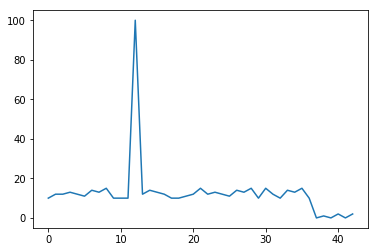

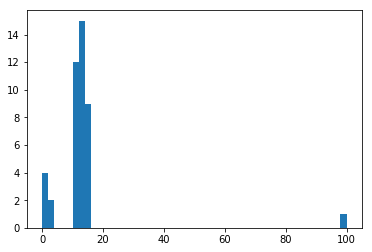

In [181]:
from numpy import array
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10,0,1,0,2,0,2]

# Plot with matplotlib
import matplotlib.pyplot as plt
new_data = np.squeeze(dataset)
plt.plot(new_data)
plt.show()


plt.hist(dataset,bins = 50)
plt.xlabel = "Point"
plt.ylabel = "Value"

plt.show()








In [290]:
import numpy as np
import pandas as pd

In [291]:
outlier = []
def detect_outlier(data_points):
    threshold = 3
    mean = np.mean(data_points)
    std  = np.std(data_points)
    
    for y in data_points:
        z_score = (y-mean)/std
        if np.abs(z_score) > threshold:
            outlier.append(y)
    return outlier

print(detect_outlier(dataset))
    
    
    

[100]


In [292]:
outlier = []
outstanding  = []
def iqr_detect(data_points):
    sorted(data_points)
    q1, q3 = np.percentile(dataset,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    for y in data_points:
        if y < lower_bound: 
            outlier.append(y)
        if y > upper_bound:
            outstanding.append(y)
    return outlier, outstanding    

x1, x2 = iqr_detect(dataset)
print(x1)
print(x2)
            

[0, 1, 0, 2, 0, 2]
[100]


In [293]:
import glob

path = '/Users/brian/Downloads/report' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
#frame.head
frame.count


<bound method DataFrame.count of        AccountCurrencyCode AccountDescriptiveName        AccountTimeZone  \
0                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
1                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
2                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
3                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
4                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
5                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
6                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
7                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
8                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
9                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
10                     USD     Hopster - Malaysia  (GMT+08:00) Singapore   
11                     USD     Hopster - Malaysia  (GMT

In [294]:
frame.columns


Index(['AccountCurrencyCode', 'AccountDescriptiveName', 'AccountTimeZone',
       'ActiveViewCpm', 'ActiveViewCtr', 'ActiveViewImpressions',
       'ActiveViewMeasurability', 'ActiveViewMeasurableCost',
       'ActiveViewMeasurableImpressions', 'ActiveViewViewability', 'AdGroupId',
       'AdGroupName', 'AdGroupStatus', 'AdNetworkType1', 'AdNetworkType2',
       'AllConversionRate', 'AllConversions', 'AllConversionValue',
       'AverageCost', 'AverageCpc', 'AverageCpe', 'AverageCpm', 'AverageCpv',
       'BaseAdGroupId', 'BaseCampaignId', 'BiddingStrategyId',
       'BiddingStrategyName', 'BiddingStrategyType', 'BidModifier',
       'CampaignId', 'CampaignName', 'CampaignStatus', 'Clicks',
       'ConversionRate', 'Conversions', 'ConversionValue', 'Cost',
       'CostPerAllConversion', 'CostPerConversion', 'CpcBid', 'CpcBidSource',
       'CpmBid', 'CpmBidSource', 'Criteria', 'CriteriaDestinationUrl',
       'CrossDeviceConversions', 'Ctr', 'CustomerDescriptiveName', 'Date',
       'D

In [295]:
sub1 =  frame[['Device','CampaignId','CampaignStatus','Clicks','Id','AdNetworkType1','AdNetworkType2','Cost','Conversions','Ctr','AverageCpc','DisplayName']]

In [296]:
sub1['Device'].value_counts()

HIGH_END_MOBILE    104663
TABLET              20122
Name: Device, dtype: int64

In [297]:
sub1['AdNetworkType1'].value_counts()

CONTENT    124785
Name: AdNetworkType1, dtype: int64

In [298]:
sub1['AdNetworkType2'].value_counts()

CONTENT    124785
Name: AdNetworkType2, dtype: int64

In [299]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sub1.loc[sub1['Cost'] > 0]['Cost'].describe()

count       31748.000
mean       296634.858
std       4049269.688
min          4709.000
25%         15600.500
50%         25645.000
75%         46634.000
max     164841156.000
Name: Cost, dtype: float64

In [300]:
sub1['Conversions'].describe()

count   124785.000
mean         0.040
std          1.062
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         57.000
Name: Conversions, dtype: float64

In [301]:

sub1.loc[sub1['Clicks'] > 0]['Clicks'].describe()

count   31748.000
mean       19.155
std       276.552
min         1.000
25%         1.000
50%         1.000
75%         2.000
max      9244.000
Name: Clicks, dtype: float64

In [302]:
sub1.loc[sub1['Clicks'] > 0][['Clicks','Cost','Conversions']].describe()

Clicks          Cost  Conversions
count 31748.000     31748.000    31748.000
mean     19.155    296634.858        0.157
std     276.552   4049269.688        2.101
min       1.000      4709.000        0.000
25%       1.000     15600.500        0.000
50%       1.000     25645.000        0.000
75%       2.000     46634.000        0.000
max    9244.000 164841156.000       57.000

In [303]:
sub1.loc[sub1['Conversions'] > 0]['Conversions'].describe()

count   972.000
mean      5.146
std      10.889
min       1.000
25%       1.000
50%       1.000
75%       2.000
max      57.000
Name: Conversions, dtype: float64

In [304]:
sub1.loc[sub1['Conversions'] > 0]['Conversions'].head

<bound method NDFrame.head of 215       1.000
376       2.000
460       1.000
464       1.000
598       1.000
726      21.000
974       1.000
1060      1.000
1088      1.000
1231      1.000
1291      1.000
1419      1.000
1784      1.000
1801      1.000
1987     12.000
2007      1.000
2014      2.000
2016      1.000
2030      1.000
2139      1.000
2243     47.000
2334      2.000
2390     37.000
2427      1.000
2576      1.000
2656      1.000
2667      1.000
2737      1.000
2745      1.000
2767      1.000
          ...  
121027    1.000
121062    1.000
121471    3.000
121491    1.000
121576    1.000
122061    1.000
122197    1.000
122480    1.000
122521    1.000
122545    1.000
122577    1.000
122629    1.000
122777    1.000
122847    3.000
122858   24.000
122928    2.000
122993    1.000
123096    1.000
123150    1.000
124014   41.000
124015    7.000
124086    1.000
124114   17.000
124181    3.000
124214    1.000
124215   26.000
124227    2.000
124287    2.000
124443   57.000
124531    

In [305]:
sub1['Conversions'].describe()

count   124785.000
mean         0.040
std          1.062
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         57.000
Name: Conversions, dtype: float64

In [306]:
plt.hist(sub1.loc[sub1['Conversions'] > 0]['Conversions'],bins =  100)
plt.show()

In [307]:
sub1.loc[sub1['Conversions'] > 0]['Conversions'].sum()

5002.0

In [308]:
frame['Conversions'].sum()

5002.0

In [309]:
frame['CampaignId'].value_counts()

1543424045    124785
Name: CampaignId, dtype: int64

In [310]:
frame.count

<bound method DataFrame.count of        AccountCurrencyCode AccountDescriptiveName        AccountTimeZone  \
0                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
1                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
2                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
3                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
4                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
5                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
6                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
7                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
8                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
9                      USD     Hopster - Malaysia  (GMT+08:00) Singapore   
10                     USD     Hopster - Malaysia  (GMT+08:00) Singapore   
11                     USD     Hopster - Malaysia  (GMT

CampaignId -> [PlacementIds] -> [CampaignIds] ## PlacementId : CampaignId

Filter in placement_report with CampaignIds in [CampaignIDs] ## placement_report



In [315]:
selected_table = frame[['AccountDescriptiveName', 'AdGroupId','BaseAdGroupId' ,  'CampaignId' ,  'Criteria' , 'CriteriaDestinationUrl' ,'Device','DisplayName','Id','FinalAppUrls' ,'ExternalCustomerId' ,'FinalMobileUrls' ,  'FinalUrls' ,  'IsNegative' ,'IsRestrict','Status' ,'AdNetworkType1' ,'AdNetworkType2' ,'AverageCost' ,'AverageCpc' ,  'AverageCpm' , 'Clicks' ,'ConversionRate' ,'Ctr' ,'Impressions']]

In [323]:
selected_table[['AdGroupId','BaseAdGroupId','CampaignId']] = selected_table[['AdGroupId','BaseAdGroupId','CampaignId']].astype(str)


In [324]:
for c in selected_table:
    if df[c].dtype == 'object':
        print('Max length of column %s: %s\n' %  (c, selected_table[c].map(len).max()))

Max length of column AccountDescriptiveName: 18

Max length of column Criteria: 81

Max length of column CriteriaDestinationUrl: 3

Max length of column Device: 15

Max length of column DisplayName: 147

Max length of column Id: 3

Max length of column FinalAppUrls: 3

Max length of column FinalMobileUrls: 3

Max length of column FinalUrls: 3

Max length of column Status: 7

Max length of column AdNetworkType1: 7

Max length of column AdNetworkType2: 7

Max length of column ConversionRate: 7

Max length of column Ctr: 7



In [326]:
for c in selected_table:
    print('Max - Min length of column %s: %s - %s\n' %  (c, selected_table[c].map(len).max(),selected_table[c].map(len).min()))

Max - Min length of column AccountDescriptiveName: 18 - 18

Max - Min length of column AdGroupId: 11 - 11

Max - Min length of column BaseAdGroupId: 11 - 11

Max - Min length of column CampaignId: 10 - 10

Max - Min length of column Criteria: 81 - 5

Max - Min length of column CriteriaDestinationUrl: 3 - 3

Max - Min length of column Device: 15 - 6

Max - Min length of column DisplayName: 147 - 5

Max - Min length of column Id: 3 - 3

Max - Min length of column FinalAppUrls: 3 - 3



TypeError: object of type 'int' has no len()

```
CREATE DATABASE performance_reporting;
```
```
CREATE ROLE sakari with LOGIN PASSWORD 'sakari10101!'
create user sakari with encrypted password 'sakari*****!'
grant all privileges on database performance_report to sakari;
```
```sh
psql  performance_report -U sakari -W 
```
```
CREATE TABLE placement_performance_report(
AccountDescriptiveName VARCHAR(100),
AdGroupId CHAR(11),
BaseAdGroupId CHAR(11),
CampaignId CHAR(10),
Criteria VARCHAR(200),
CriteriaDestinationUrl TEXT ,
Device VARCHAR(30),
DisplayName  TEXT,
Id TEXT NOT NULL ,
FinalAppUrls TEXT,
ExternalCustomerId TEXT,
FinalMobileUrls TEXT,
FinalUrls TEXT,
IsNegative BOOLEAN,
IsRestrict BOOLEAN,
Status VARCHAR(20),
DateTime timestamp,
AdNetworkType1 VARCHAR(30),
AdNetworkType2 VARCHAR(30),
AverageCost REAL,
AverageCpc REAL,
AverageCpm REAL,
Clicks INT,
ConversionRate REAL,
Ctr REAL,
Impressions INT, PRIMARY KEY (Id,CampaignId,DateTime)
) ;
```

In [332]:
selected_table[['DisplayName','Id','Status']]['Status'].value_counts()

REMOVED    124785
Name: Status, dtype: int64

In [ ]:
selected 